## Analyzing the Global Cybersecurity Index

Fahmida Rashid

fr48@columbia.edu

October 29, 2019

The International Telecommunication Union publishes the Global Cybersecurity Index (GCI) as part of an effort to understand how different countries are dealing with cybersecurity. GCI is a composite index which measures the "commitment of countries to cybersecurity" in five areas: legal, technical, organizational, capacity building, and cooperation. ITU combines 25 indicators into one benchmark measure to monitor the cybersecurity commitment of 193 ITU Member States and the State of Palestine. 

The GCI can be found here: https://www.itu.int/en/ITU-D/Cybersecurity/Pages/global-cybersecurity-index.aspx The reports are generated every other year, and began in 2014. The 2018 index is the third edition in the analysis.

The CSV file was created from Annex-A of the 2018 report. Previous reports were also referenced for the analysis.

In [7]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
# Read in CSV file from 2018
df = pd.read_csv('gci-2018.csv')
df

,Country,Score,Rank,Continent
0,Afghanistan,0.177,100,Asia
1,Albania,0.631,88,Europe
2,Algeria,0.262,67,Middle East
3,Andorra,0.115,153,Europe
4,Angola,0.097,148,Africa
...,...,...,...,...
191,Viet Nam,0.693,100,Asia
192,Yemen,0.019,172,Middle East
193,Zambia,0.436,90,Africa
194,Zimbabwe,0.186,124,Africa


In [9]:
df.describe()

,Score
count,196.000000
mean,0.431816
std,0.303679
min,0.004000
25%,0.136750
50%,0.418000
75%,0.719500
max,0.931000


The histogram shows very clear groupings, with some scores clustered around 0.8 for higher countries, and then in the high 0.6. There are a lot of countries still below 0.2.

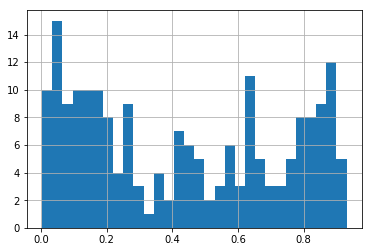

In [10]:
#plot the scores in a histogram
df['Score'].hist(bins=30)

In [11]:
#best gci per continent
df.groupby('Continent').Score.max()

Continent
Africa           0.880
Asia             0.898
Australia        0.890
Europe           0.931
Former USSR      0.857
Middle East      0.881
North America    0.926
South America    0.681
Name: Score, dtype: float64

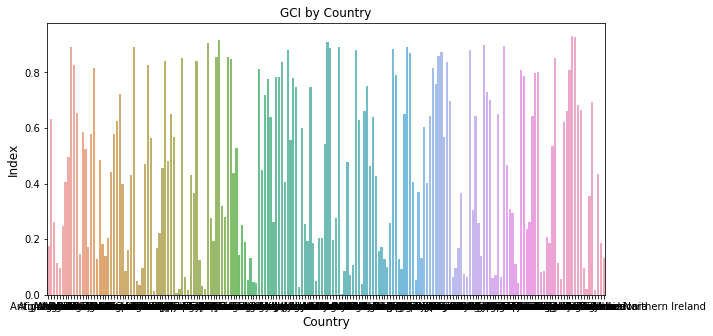

In [12]:
#plot a bar graph of the continent
plt.figure(figsize=(10,5))
sns.barplot(df.Country, df.Score, alpha=0.8)
plt.title('GCI by Country')
plt.ylabel('Index', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

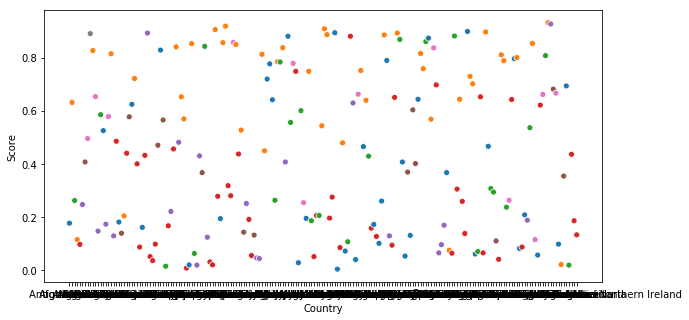

In [30]:
#colors per continent would be easier to see 
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="Country", y="Score", hue="Continent", data=df)
ax.legend_.remove()

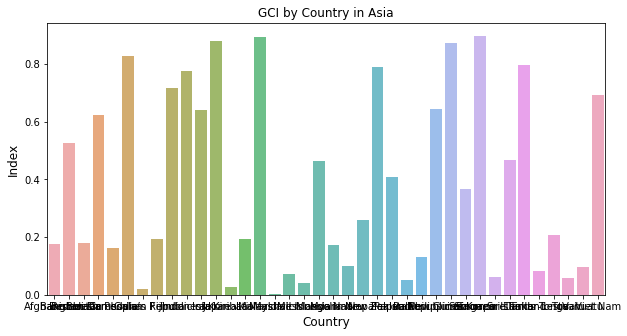

In [13]:
focus = df[df['Continent'] =='Asia']

plt.figure(figsize=(10,5))
sns.barplot(focus.Country, focus.Score, alpha=0.8)
plt.title('GCI by Country in Asia')
plt.ylabel('Index', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

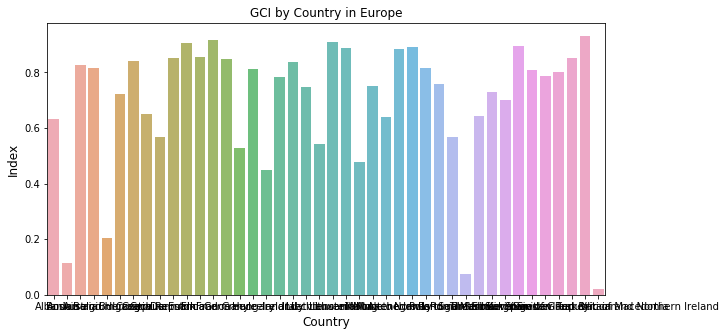

In [14]:
focus = df[df['Continent'] =='Europe']

plt.figure(figsize=(10,5))
sns.barplot(focus.Country, focus.Score, alpha=0.8)
plt.title('GCI by Country in Europe')
plt.ylabel('Index', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

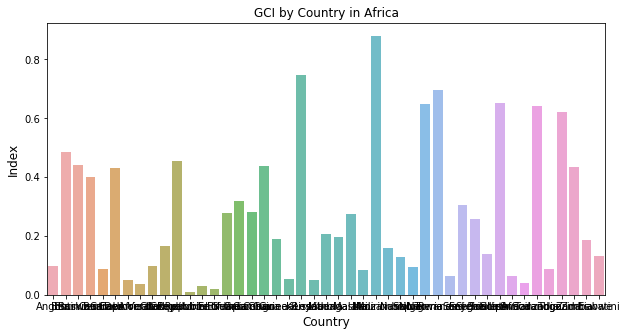

In [15]:
focus = df[df['Continent'] =='Africa']

plt.figure(figsize=(10,5))
sns.barplot(focus.Country, focus.Score, alpha=0.8)
plt.title('GCI by Country in Africa')
plt.ylabel('Index', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

It is no surprise that the index is dominated by Europe and the USA, although it was surprising that Malaysia (Asia) had a higher score than Russia (which doesn't show up until #28)

In [16]:
#top 10 gci
df.sort_values(by=['Score'], ascending=False).head(10)

,Country,Score,Rank,Continent
184,United Kingdom of Great Britain and Northern I...,0.931,12,Europe
185,United States of America,0.926,2,North America
60,France,0.918,8,Europe
98,Lithuania,0.908,56,Europe
56,Estonia,0.905,5,Europe
153,Singapore,0.898,6,Asia
160,Spain,0.896,19,Europe
102,Malaysia,0.893,3,Asia
30,Canada,0.892,9,North America
126,Norway,0.892,11,Europe


The index breaks out the countries by their region (which corresponds mostly to the Continent). I create an analysis looking at every year of the report (2014, 2016, 2018) and plotting the top countries from each region. The 2014 report is from here: https://www.itu.int/dms_pub/itu-d/opb/str/D-STR-SECU-2015-PDF-E.pdf

In [17]:
trendfile = pd.read_csv('trendlines.csv')
trendfile

,country,year,score,Continent
0,Mauritius,2018,0.880,Africa
1,Kenya,2018,0.748,Africa
2,United States of America,2018,0.926,North America
3,Canada,2018,0.892,North America
4,Brazil,2018,0.577,South America
5,Uruguay,2018,0.681,South America
6,Saudi Arabia,2018,0.881,Middle East
7,Iran,2018,0.641,Middle East
8,Israel,2018,0.783,Middle East
9,Singapore,2018,0.898,Asia


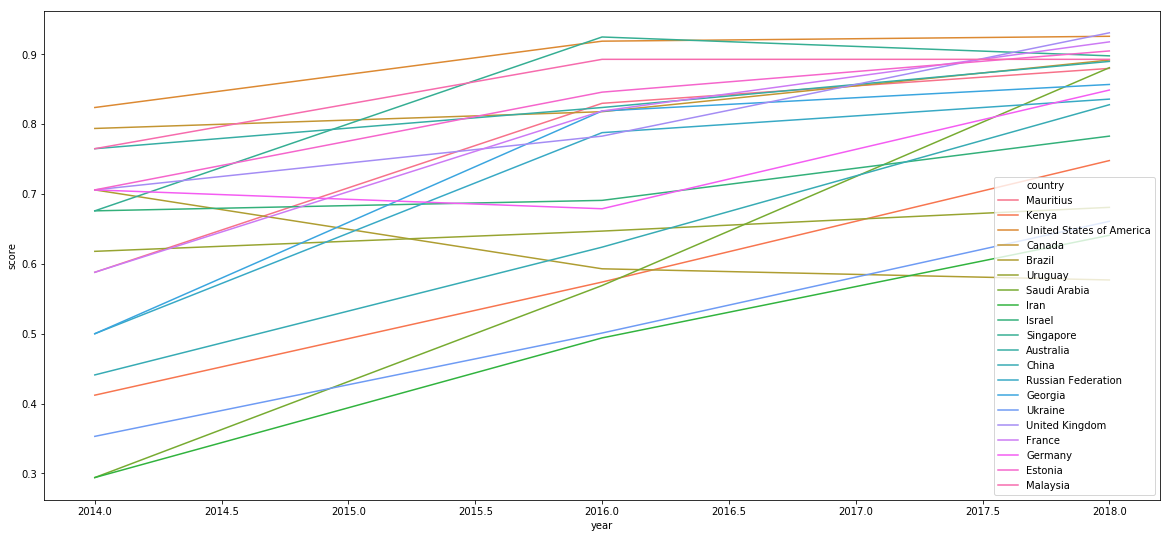

In [18]:
plt.figure(figsize=(20,9)) 
sns.lineplot(data=trendfile, x='year', y='score', hue='country')

In [19]:
#too busy. trim down to 10 countries, very limited, as it's to what's of interest to US audience
keep = ["United States of America","Iran","Israel","Singapore","China","Russian Federation","Ukraine","United Kingdom"]
trend = trendfile[trendfile.country.isin(keep)]

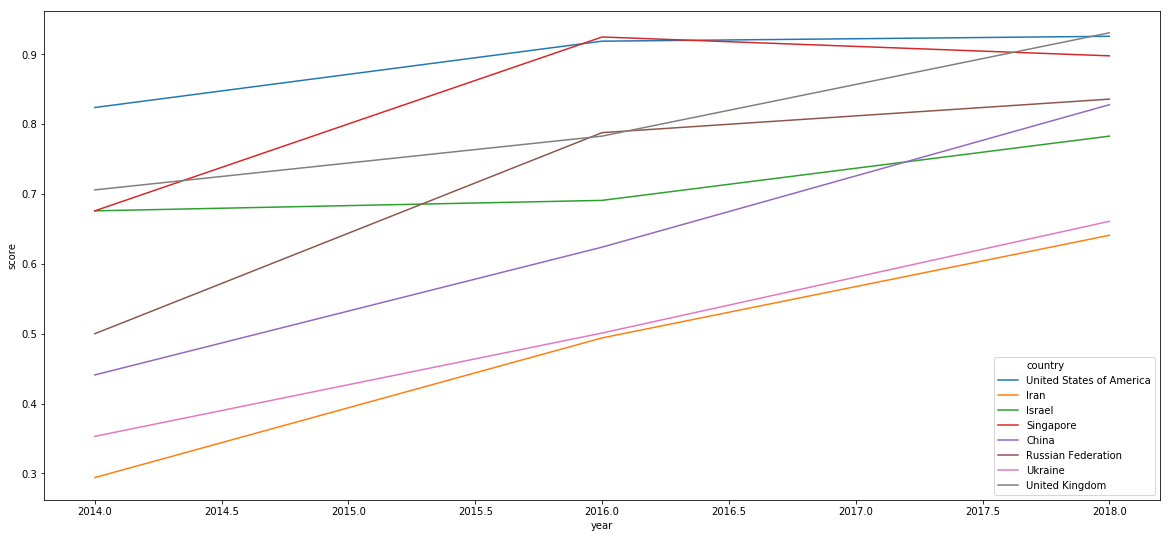

In [20]:
plt.figure(figsize=(20,9)) 
sns.lineplot(data=trend, x='year', y='score', hue='country')

In [21]:
export_csv = trend.to_csv (r'trends.csv',index=True)

In [22]:
# of interest, one from each region
keep = ["United States of America","Mauritius","Malaysia","Uruguay","Georgia,","Estonia","Russian Federation","Ukraine","United Kingdom"]
interest = trendfile[trendfile.country.isin(keep)]
interest

,country,year,score,Continent
0,Mauritius,2018,0.880,Africa
2,United States of America,2018,0.926,North America
5,Uruguay,2018,0.681,South America
12,Russian Federation,2018,0.836,Former USSR
14,Ukraine,2018,0.661,Former USSR
15,United Kingdom,2018,0.931,Europe
18,Estonia,2018,0.905,Europe
19,Malaysia,2018,0.893,Asia
20,Mauritius,2016,0.830,Africa
22,United States of America,2016,0.919,North America


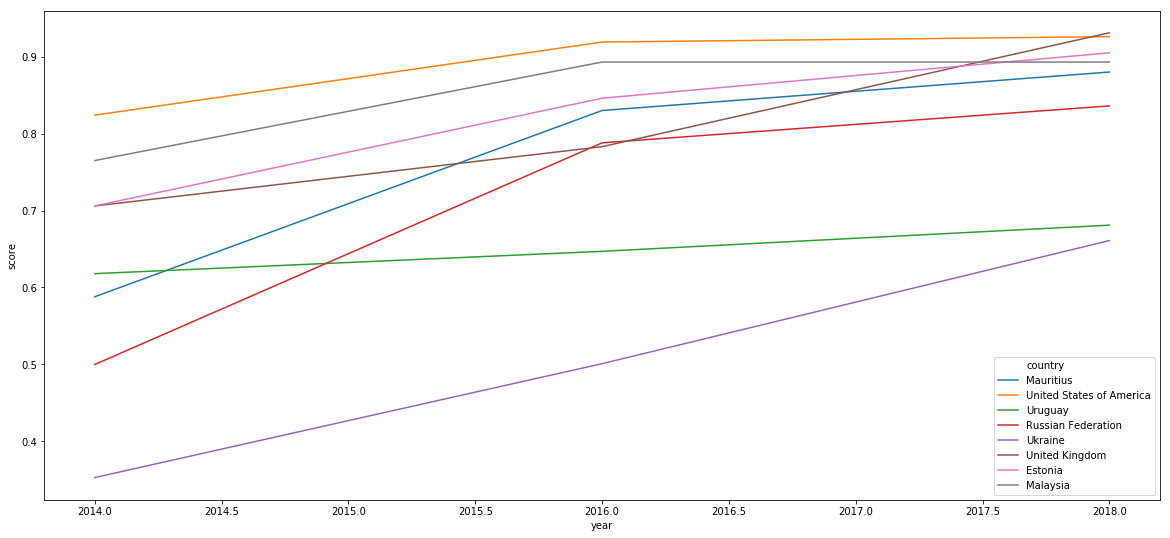

In [23]:
plt.figure(figsize=(20,9)) 
sns.lineplot(data=interest, x='year', y='score', hue='country')